In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
sns.set(style="ticks", color_codes=True)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:

abalone = pd.read_csv('abalone.csv', sep=',')

# Columns/Features

Xcolumnnames = ['Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight', 'Viscera weight', 'Shell weight']

# Categorical Column 
Xcatcolumnname = ['Sex']

# Output column
Ycolumnname = ['Rings']

abalone.columns = Xcatcolumnname + Xcolumnnames + Ycolumnname

In [4]:
abalone.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
1,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
2,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
3,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
4,I,0.425,0.300,0.095,0.3515,0.1410,0.0775,0.120,8


In [5]:
rand_state = 27 
trainsize = 0.8 
testsize = 0.2 
X = abalone[Xcolumnnames]
Y = abalone[Ycolumnname]

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = testsize, random_state = rand_state)

# Storing the original train and test data to be used for ablation study later on

X_train_1 = X_train
X_test_1 = X_test


# Normalization
Normalize the data using MinMaxScaler to get the range of values in the original data to a scale between 0 to 1, thus simplifying the calculations for the model further.

In [6]:
min_max_scaler = MinMaxScaler()
min_max_scaler.fit(X_train)
X_train = min_max_scaler.transform(X_train)
X_test = min_max_scaler.transform(X_test)

In [7]:
accuracy_list = [] 
kmax = 101 
kstep = 1 
k_range = range(1, kmax, kstep)

for i in k_range:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    accuracy_list.append(acc)
    best_acc = max(accuracy_list)
    best_k = accuracy_list.index(best_acc)+1 
 

Text(0, 0.5, 'Accuracy')

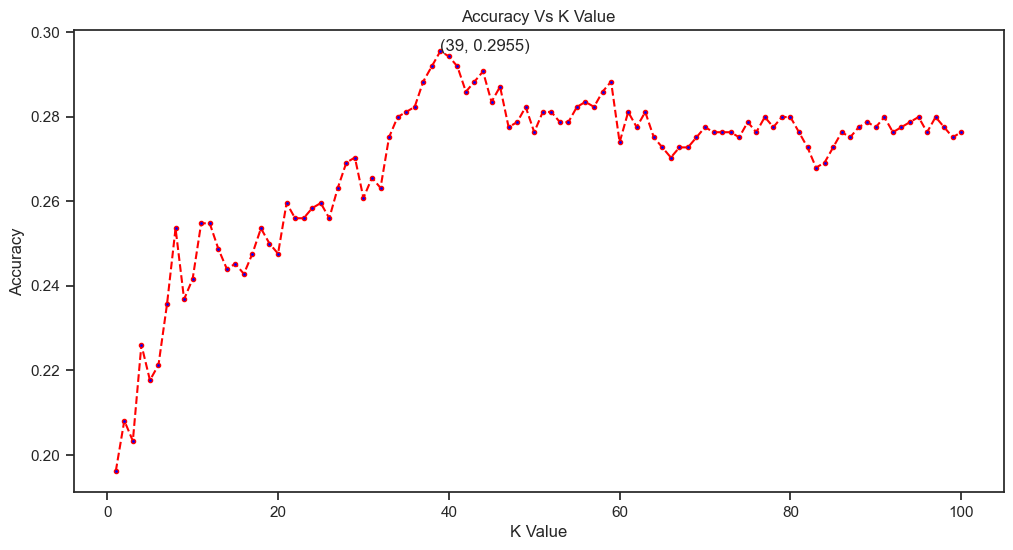

In [8]:
fig, ax = plt.subplots(figsize=(12,6))
text = '('+ str(best_k) + ', ' + str(round(best_acc, 4)) + ')'
ax.plot(k_range, accuracy_list, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=3)

plt.text(best_k, best_acc, text)
plt.title("Accuracy Vs K Value")
plt.xlabel('K Value')
plt.ylabel('Accuracy')